In [20]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
import networkx as nx
import osmnx as ox
import seaborn as sns
from itertools import product, combinations
import pickle as pkl
from randomnetworkmodel import *
from street_network_from_json import *
import pandas as pd

## 2 Random network model

In [8]:
def set_edge_att(G):
    bc, bci = betweenness_impact(G)
    nx.set_edge_attributes(G, bc, name='betweenness centrality')
    nx.set_edge_attributes(G, bci, name='betweenness impact')

In [9]:
cs = 3, 5,
ns = 10, 30, #100
rs = .3, .9
reps = 1
paramscan = [{'C': c, 'n': n, 'r': r, 'rep': i, 'G': get_randomnetwork(n, c, r)} for c, n, r, i in
             product(cs, ns, rs, range(reps))]

Gdf = pd.DataFrame(paramscan)
Gdf.G.apply(set_edge_att)

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
Name: G, dtype: object

In [17]:
Gdf.G.iloc[0].edges(data=True)
cm = plt.get_cmap(name='coolwarm')
cm.set_bad('red')

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("coolwarm").copy()
  This is separate from the ipykernel package so we can avoid doing imports until


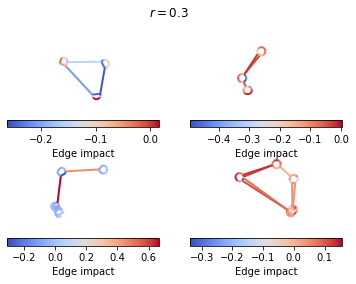

In [18]:
r = rs[0]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('$r = {}$'.format(r))
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
    # ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G = Gdf.loc[(Gdf.n==n) & (Gdf.C==c) & (Gdf.r==r), 'G'].iloc[0]
    # bc = list(nx.edge_betweenness_centrality(G, weight='weight').values())
    # ax.set_title('$g(G) = {:.2f}$'.format(np.mean(bc)))
    ei = nx.get_edge_attributes(G, 'betweenness impact').values()
    norm = mpl.colors.Normalize(vmin=min(ei), vmax=max(ei))
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx_edges(G, pos=pos, ax=ax, alpha=1, width=2,
                     edge_color=ei,                     edge_cmap=cm)
    ax.set_axis_off()
    plt.colorbar(mappable=ScalarMappable(norm=norm, cmap=cm), ax=ax, label='Edge impact',
                 orientation='horizontal')
    ax.set_aspect('equal')


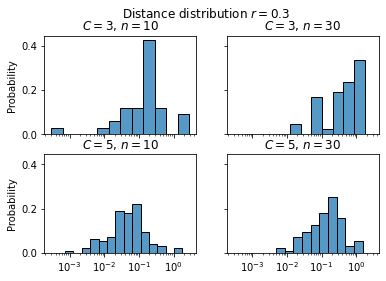

In [19]:
# lengthdict = dict(nx.all_pairs_dijkstra_path_length(G_ls, weight='weight'))
lengthdicts = [dict(nx.all_pairs_dijkstra_path_length(G, weight='weight')) for G in Gdf.G]
lengths = [[lengthdicts[u][v]  for u, v in combinations(G.nodes(), 2)] for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Distance distribution $r = {}$'.format(r))
for (c, n), ax, length in zip(product(cs, ns), axs.flatten(), lengths):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(length, log_scale=True, stat='probability', ax=ax, legend=False)


In [ ]:
ebcs = [nx.get_edge_attributes(G, 'betweenness centrality').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Edge betweenness centrality $r = {}$'.format(r))
for (c, n), ax, ebc in zip(product(cs, ns), axs.flatten(), ebcs):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(ebc, log_scale=False, stat='density', ax=ax, legend=False)

In [ ]:
eis = [nx.get_edge_attributes(G, 'edge_impact').values() for G in Gdf.G]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Edge impact $r = {}$'.format(r))
for (c, n), ax, ebc in zip(product(cs, ns), axs.flatten(), ebcs):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(ebc, log_scale=False, stat='density', ax=ax, legend=False)


In [ ]:
r = rs[1]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('$r = {}$'.format(r))
Gs = []
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G, pos = get_randomnetwork(n, c, r)
    nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=.1, node_color='k', alpha=1, width=2,
                     edge_color=nx.edge_betweenness_centrality(G, weight='weight').values(), linewidths=0,
                     edge_cmap=plt.get_cmap('cool'))
    plt.tight_layout()
    ax.set_axis_off()
    Gs.append(G)

In [ ]:
lengths = [nx.get_edge_attributes(G, 'weight').values() for G in Gs]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Link lengths $r = {}$'.format(r))
for (c, n), ax, length in zip(product(cs, ns), axs.flatten(), lengths):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(length, log_scale=True, stat='density', ax=ax, legend=False)

In [ ]:
ebcs = [nx.edge_betweenness_centrality(G, weight='weight').values() for G in Gs]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Edge betweenness centrality $r = {}$'.format(r))
for (c, n), ax, ebc in zip(product(cs, ns), axs.flatten(), ebcs):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(ebc, log_scale=True, stat='density', ax=ax, legend=False)


In [ ]:
r = 0.8
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('$r = {}$'.format(r))
Gs = []
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G, pos = get_randomnetwork(n, c, r)
    nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=.1, node_color='k', alpha=1, width=2,
                     edge_color=nx.edge_betweenness_centrality(G, weight='weight').values(), linewidths=0,
                     edge_cmap=plt.get_cmap('cool'))
    plt.tight_layout()
    ax.set_axis_off()
    Gs.append(G)

In [ ]:
lengths = [nx.get_edge_attributes(G, 'weight').values() for G in Gs]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Links length $r = {}$'.format(r))
for (c, n), ax, length in zip(product(cs, ns), axs.flatten(), lengths):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(length, log_scale=True, stat='density', ax=ax, legend=False)

In [ ]:
ebcs = [nx.edge_betweenness_centrality(G, weight='weight').values() for G in Gs]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Edge betweenness centrality $r = {}$'.format(r))
for (c, n), ax, ebc in zip(product(cs, ns), axs.flatten(), ebcs):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(ebc, log_scale=True, stat='density', ax=ax, legend=False)


In [ ]:
r = 1.
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('$r = {}$'.format(r))
Gs = []
for (c, n), ax in zip(product(cs, ns), axs.flatten()):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    G, pos = get_randomnetwork(n, c, r)
    nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=.1, node_color='k', alpha=1, width=2,
                     edge_color=nx.edge_betweenness_centrality(G, weight='weight').values(), linewidths=0,
                     edge_cmap=plt.get_cmap('cool'))
    plt.tight_layout()
    ax.set_axis_off()
    Gs.append(G)

In [ ]:
lengths = [nx.get_edge_attributes(G, 'weight').values() for G in Gs]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Link length $r = {}$'.format(r))
for (c, n), ax, length in zip(product(cs, ns), axs.flatten(), lengths):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(length, log_scale=True, stat='density', ax=ax, legend=False)

In [ ]:
ebcs = [nx.edge_betweenness_centrality(G, weight='weight').values() for G in Gs]
fig, axs = plt.subplots(nrows=len(cs), ncols=len(ns), sharex=True, sharey=True, facecolor='w')
plt.suptitle('Edge betweenness centrality $r = {}$'.format(r))
for (c, n), ax, ebc in zip(product(cs, ns), axs.flatten(), ebcs):
    ax.set_title('$C = {}$, $n = {}$'.format(c, n))
    sns.histplot(ebc, log_scale=True, stat='density', ax=ax, legend=False)
